In [24]:
# save the final model to file
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [25]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [26]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [27]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [36]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
    #fit执行训练过程；
	history = model.fit(trainX, trainY,
                        batch_size=32,
                        epochs=10,
                        verbose=0,
                        validation_data=(testX, testY))
	score = model.evaluate(x_test, y_test, verbose=0)  
    
# 	# save model
# 	model.save('final_model.h5')
 

In [37]:
# entry point, run the test harness
run_test_harness()

ValueError: in user code:

    File "C:\Users\Sandrine AVIDA\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Sandrine AVIDA\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sandrine AVIDA\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Sandrine AVIDA\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Sandrine AVIDA\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Sandrine AVIDA\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)


In [4]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Conv2D, BatchNormalization, Activation

from scipy import misc
from scipy.ndimage import rotate

In [5]:
batch_size = 128            #一批处理128个手写图片
num_classes = 10         #  10分类问题
epochs = 10                   #  迭代20次

In [6]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = x_train.reshape(60000, 784)  #矩阵变换成28*28=784列作为输入
x_test = x_test.reshape(10000, 784) 
x_train = x_train.astype('float32')    #兼顾内存中的存储量，用32bit
x_test = x_test.astype('float32')
x_train /= 255                         #像素归一化[0-1] ，减少模型不稳定性
x_test /= 255


In [9]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train.shape)
print(x_test.shape)

60000 train samples
10000 test samples
(60000, 784)
(10000, 784)


In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)             #标签
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
#建模，用Sequential类
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) #全连接网络，神经元节点数512，输入层
model.add(Dropout(0.2))     #让20%神经元随机失活，每一个神经元都有机会得到更高效的学习，网络更加健壮，减小过拟合。 

model.add(Dense(512, activation='relu'))        #全连接层，512个神经元，隐藏层2  
model.add(Dropout(0.2))                         

model.add(Dense(num_classes, activation='softmax'))      #输出层为10路，用softmax概率分布，概率最大的是


In [12]:
#compile配置训练方法
model.compile(loss='categorical_crossentropy',                     
              optimizer=RMSprop(),
              metrics=['accuracy'])#多类别交叉熵，


In [13]:
#fit执行训练过程；
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/20
469/469 [==============================] - 10s 18ms/step - loss: 0.2475 - accuracy: 0.9231 - val_loss: 0.1216 - val_accuracy: 0.9621
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.0777 - val_accuracy: 0.9773
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0761 - accuracy: 0.9771 - val_loss: 0.0829 - val_accuracy: 0.9768
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0707 - val_accuracy: 0.9791
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0742 - val_accuracy: 0.9811
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0694 - val_accuracy: 0.9803
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0391 - accuracy: 0.9886 - val_loss: 0.0767 - val_accuracy: 0.98

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.13572189211845398
Test accuracy: 0.9832000136375427


In [15]:
#summary打印网格结构和参数统计
model.summary()
from tensorflow.keras.utils import plot_model
print("layer nums:", len(model.layers))
plot_model(model, to_file='MNIST_MLP.png', show_shapes=True, show_layer_names=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
layer nums: 5
You must install pydot (`pip install

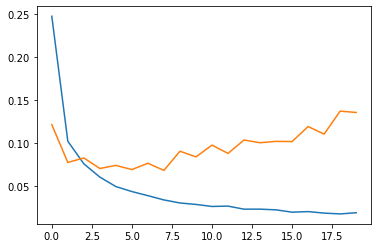

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

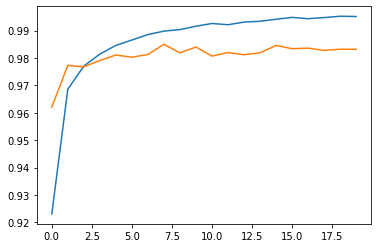

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 159ms/step


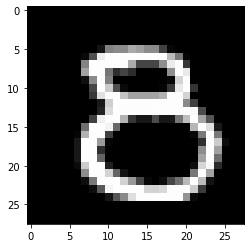

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(path="8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 784))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [19]:
prediction

8

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

y_test = np.argmax(y_test,axis=1)

accuracy_score(y_pred,y_test)

313/313 [==============================] - 1s 5ms/step


0.9832

In [21]:
confusion_matrix(y_pred,y_test)

array([[ 971,    0,    3,    2,    1,    2,    2,    0,    6,    0],
       [   1, 1128,    2,    1,    1,    0,    2,    5,    2,    4],
       [   0,    4, 1015,    2,    1,    0,    0,    7,    3,    0],
       [   1,    0,    1,  996,    0,    8,    1,    1,    0,    4],
       [   0,    0,    4,    0,  966,    1,    2,    1,    0,   12],
       [   0,    0,    0,    2,    0,  866,    1,    0,    2,    2],
       [   4,    1,    2,    0,    4,    9,  950,    0,    3,    1],
       [   1,    0,    3,    2,    1,    1,    0, 1007,    2,    3],
       [   2,    2,    1,    3,    1,    4,    0,    4,  952,    2],
       [   0,    0,    1,    2,    7,    1,    0,    3,    4,  981]],
      dtype=int64)

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       987
           1       0.99      0.98      0.99      1146
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1012
           4       0.98      0.98      0.98       986
           5       0.97      0.99      0.98       873
           6       0.99      0.98      0.98       974
           7       0.98      0.99      0.98      1020
           8       0.98      0.98      0.98       971
           9       0.97      0.98      0.98       999

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       987
           1       0.99      0.98      0.99      1146
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1012
           4       0.98      0.98      0.98       986
           5       0.97      0.99      0.98       873
           6       0.99      0.98      0.98       974
           7       0.98      0.99      0.98      1020
           8       0.98      0.98      0.98       971
           9       0.97      0.98      0.98       999

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
scipy.ndimage.interpolation.rotate(each_input.reshape(28, 28), 10, cval=0.01, reshape=False).reshape(1, -1)

In [ ]:
model.save("mon_2eme_mnist.hdf5")

In [1]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [2]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

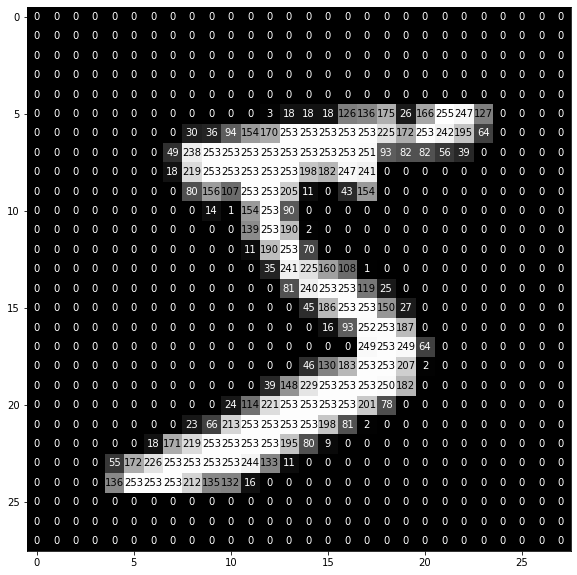

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

Text(0.5, 1.0, '[2]')

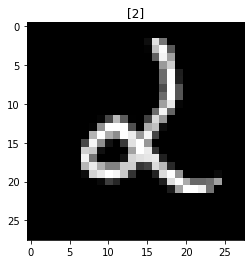

In [4]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])

In [5]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [6]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [7]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [9]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2307 - accuracy: 0.9329 - val_loss: 0.1255 - val_accuracy: 0.9629
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 0.0885 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0869 - val_accuracy: 0.9736
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0856 - val_accuracy: 0.9757
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0868 - val_accuracy: 0.9758
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0939 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0904 - val_ac

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 10)                3930      
                                                                 
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________


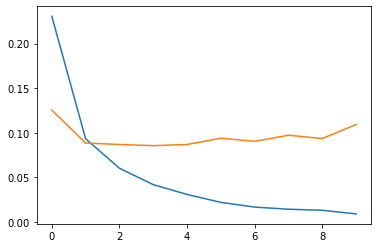

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

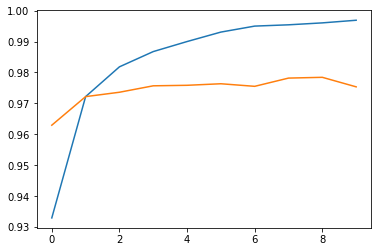

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 191ms/step


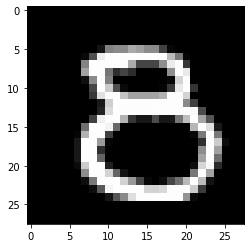

In [14]:
from tensorflow.keras.preprocessing import image

img = image.load_img(path="8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [15]:
prediction

8

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_pred,y_test)

313/313 [==============================] - 1s 3ms/step


0.9778

In [14]:
confusion_matrix(y_pred,y_test)

array([[ 968,    0,    5,    0,    1,    2,    3,    0,    1,    1],
       [   1, 1130,    0,    0,    0,    0,    2,    2,    0,    2],
       [   0,    1, 1003,    1,    1,    0,    0,    4,    4,    0],
       [   1,    0,    2,  990,    1,    6,    0,    3,   12,    1],
       [   1,    0,    4,    0,  958,    0,    1,    0,    3,    4],
       [   2,    0,    0,    4,    1,  875,    3,    0,    6,    5],
       [   4,    1,    3,    0,    5,    3,  947,    0,    3,    1],
       [   1,    0,   12,    5,    1,    0,    2, 1015,    5,    7],
       [   2,    3,    3,    1,    1,    2,    0,    1,  935,    0],
       [   0,    0,    0,    9,   13,    4,    0,    3,    5,  988]],
      dtype=int64)

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       981
           1       1.00      0.99      0.99      1137
           2       0.97      0.99      0.98      1014
           3       0.98      0.97      0.98      1016
           4       0.98      0.99      0.98       971
           5       0.98      0.98      0.98       896
           6       0.99      0.98      0.98       967
           7       0.99      0.97      0.98      1048
           8       0.96      0.99      0.97       948
           9       0.98      0.97      0.97      1022

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
model.save("mnist.hdf5")